In [1]:
import cv2
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point

In [17]:
# 读取shp文件
shp_file = 'C:/Users/xianyu/GraduationProject/tobacco_plant_count/data/temp/061301_pred.shp'
gdf = gpd.read_file(shp_file)


# 计算短边长度
def calc_shortest_side(rectangle):
    obb = rectangle.minimum_rotated_rectangle
    coords = obb.exterior.coords
    p1 = Point(coords[0])
    p2 = Point(coords[1])
    p3 = Point(coords[2])
    side_1 = p1.distance(p2)
    side_2 = p2.distance(p3)
    return min(side_1, side_2)


shortest_edges = gdf.geometry.apply(calc_shortest_side).sort_values()
# shortest_edges.rename('rank', inplace=True)

In [47]:
def get_bound(arr, ratio):
    # 计算窗口大小
    sorted_arr = np.sort(arr)
    window_size = round(len(sorted_arr) * ratio)
    print(window_size)
    diff_values = np.array(
        [sorted_arr[i + window_size - 1] - sorted_arr[i] for i in range(len(sorted_arr) - window_size)]\
    )
    min_bounds = np.argmin(diff_values)
    return sorted_arr[min_bounds], sorted_arr[min_bounds + window_size - 1]


bounds = get_bound(shortest_edges, 0.5)
print(bounds)


92322
(0.42877986998158923, 0.6870256798872479)


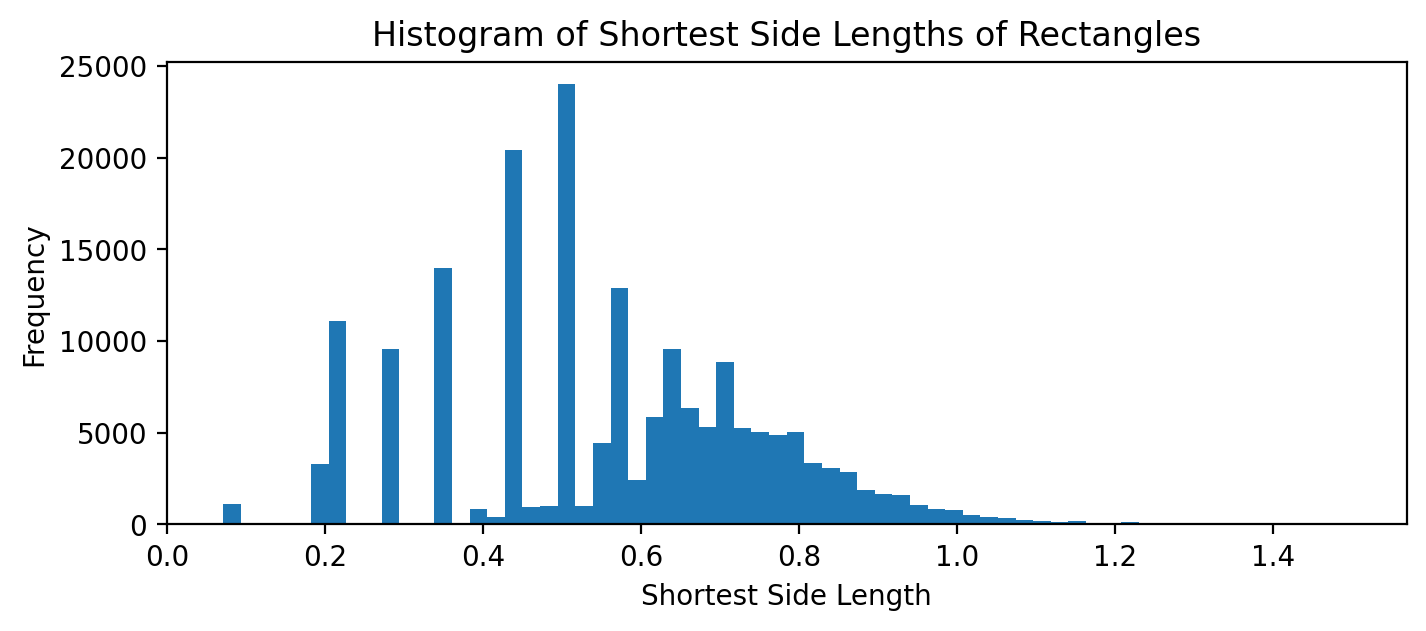

In [46]:
# 绘制直方图
data = shortest_edges[shortest_edges < 1.5]
plt.figure(figsize=(8, 3), dpi=200)
plt.hist(
    data,
    64,
)
plt.xlabel('Shortest Side Length')
plt.ylabel('Frequency')
plt.title('Histogram of Shortest Side Lengths of Rectangles')
plt.show()

In [25]:
data = np.array(shortest_edges)

hist, bin_edges = np.histogram(data, bins=128)
cumfreq = np.cumsum(hist) / np.sum(hist)
for i in zip(hist[:64],cumfreq[:64]):
    print(i)
# 计算累积概率和累积平均值
cum_prob = np.cumsum(hist)

(1138, 0.006163244747973116)
(0, 0.006163244747973116)
(70, 0.006542354706108544)
(0, 0.006542354706108544)
(14404, 0.08455235237729022)
(16, 0.0846390060820069)
(9621, 0.1367449618994492)
(59, 0.13706449743559193)
(14001, 0.2128919049192225)
(148, 0.2136934516878517)
(1160, 0.21997584527981023)
(21135, 0.3344399733539858)
(1214, 0.3410148231993631)
(24308, 0.4726634640901632)
(4830, 0.4988220512015078)
(13863, 0.5739020704819571)
(6430, 0.6087260280649686)
(11473, 0.6708621502033654)
(9089, 0.7200868703389784)
(10985, 0.7795800544835169)
(7550, 0.8204697713966952)
(7343, 0.8602384060051017)
(6761, 0.8968550121044394)
(4414, 0.9207606028931505)
(3817, 0.941432927324621)
(2698, 0.9560449082824695)
(2150, 0.9676889998537719)
(1435, 0.9754607539955482)
(1128, 0.9815698401780734)
(655, 0.985117226214912)
(537, 0.9880255411794653)
(316, 0.9897369518476195)
(203, 0.9908363707262122)
(216, 0.9920061957398872)
(122, 0.9926669302383518)
(146, 0.9934576452938915)
(117, 0.9940913005096321)
(112, 

In [6]:
min_value = data.min()
max_value = data.max()

data_uint8 = (data - min_value) / (max_value - min_value) * 255
data_uint8 = data_uint8.astype(np.uint8)
# 计算阈值
threshold, img = cv2.threshold(data_uint8, 0, 255, cv2.THRESH_OTSU)
print(threshold)
print(threshold / 255 * (max_value - min_value) + min_value)

25.0
0.14157651540938546
